# Logistic Regression

In [37]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets

%config Completer.use_jedi = False

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

np.random.seed(42)
print("Imports Done!")

Imports Done!


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Логистическая регрессия

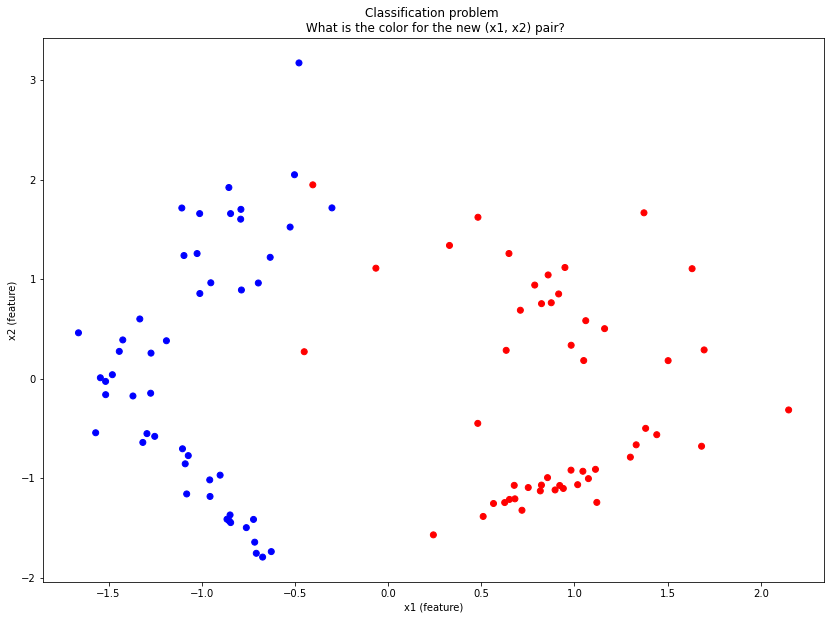

In [3]:
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)

colors = ['red' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)");

# Линейный классификатор

Построим случайную прямую. Насколько хорошо она описывает данные?

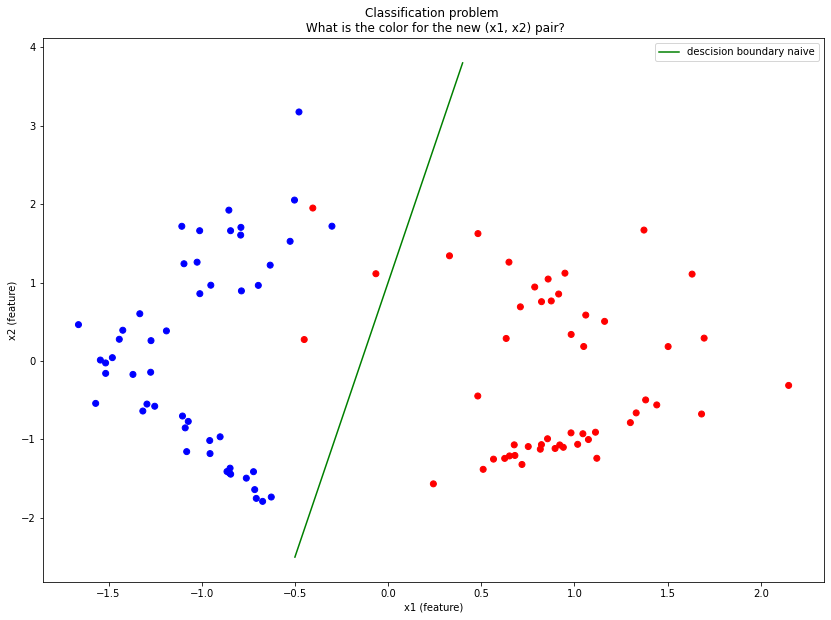

In [4]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='green', label='descision boundary naive')
plt.legend();

## Как принимается решение

Простой вариант - узнать, с какой стороны от гиперплоскости находится точка

$$\hat{y} = sign(x\theta)$$

In [5]:
w = np.array([7, -1, 1]) # Ax + By + C = 0
     
# Замечание: расстояние от точки (x0, y0) до прямой Ax + By + C это abs(Ax0 + By0 + C) / sqrt(A^2 + B^2)
    
def predict(x, w):
    return np.sign(x.dot(w))

x_pred = np.hstack([np.random.rand(10, 2) * 4 - 2, np.ones(10).reshape(-1, 1)])
y_pred = predict(x_pred, w)

print(x_pred.shape)
print(y_pred.shape)

(10, 3)
(10,)


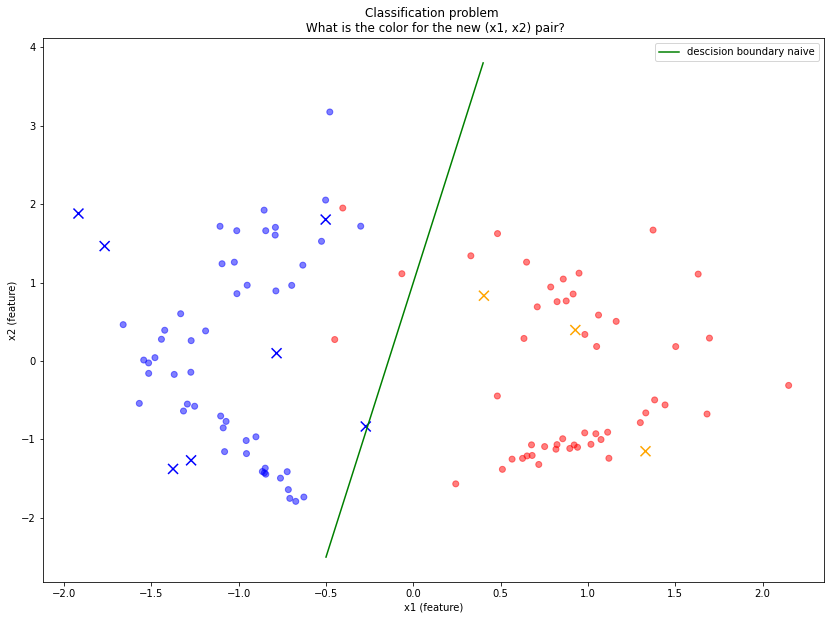

In [6]:
x_naive = np.arange(-0.5, 0.5, 0.1)
# naive boundary
y_naive = 7 * x_naive + 1

plt.scatter(x_pred[:, 0], x_pred[:, 1], c=['orange' if y_i > 0 else 'blue' for y_i in y_pred], marker='x', s=100)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
plt.plot(x_naive, y_naive, c='green', label='descision boundary naive')
plt.legend();

## Как оценить результат - простой вариант

Отступ (margin) - величина $M_i = y_i \cdot x_i\theta$ (для $y = 1$ или $y = -1$), где $x_i$ - элемент обучающей выборки, $y_i$ - его класс

$$M_i \leq 0 \Rightarrow y_i \neq \hat{y_i}$$
$$M_i > 0 \Rightarrow y_i = \hat{y_i}$$

Функция потерь zero-one loss:
$$ f(x) = \begin{cases}
      1, & \text{если}\space \hat{y} \neq y, \\
      0, & \text{если}\space \hat{y} = y
    \end{cases}
$$ 

Эмпирический риск:
$$Q(\theta, x) = \frac{1}{n} \sum_{i=1}^{n} f(x) = \frac{1}{n} \sum_{i=1}^{n}[M_i < 0]$$

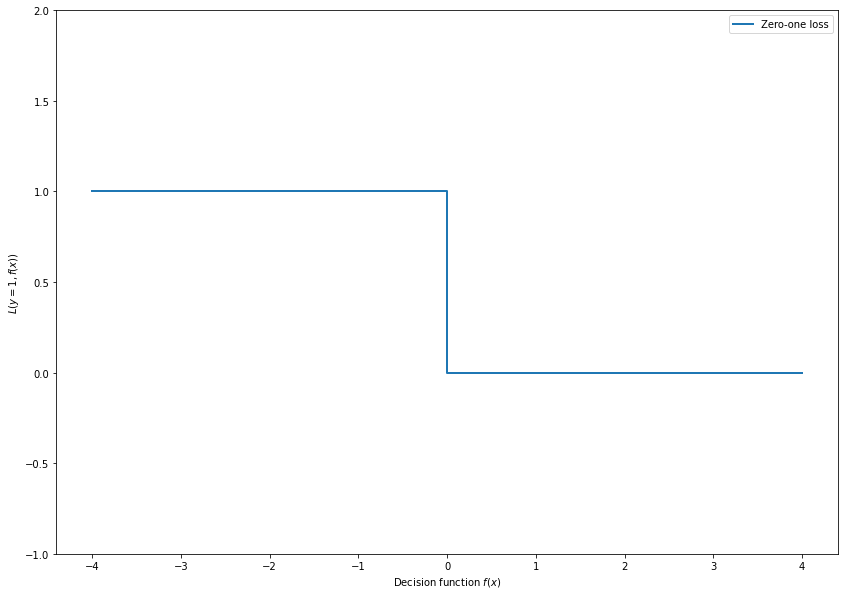

In [7]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
# plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 2));

In [8]:
from sklearn.metrics import zero_one_loss

# print(y[:10])
# print(y_pred)
# zero_one_loss(y[:10], y_pred)
zero_one_loss([0, 0, 1, 1], [0, 0, 0, 1])

0.25

## Переформулируем задачу
Вместо класса будем предсказывать вероятность принадлежности классу

$$\hat{p} = \sigma(x\theta) $$

где 

$$\sigma(t)=\frac{1}{1 + exp(-t)}$$

Пусть P вероятность принадлежности к классу. Тогда отношение шансов (odds ratio):


$$ OR = \frac{P} {1 - P} $$ <br>
$$ log {OR} \in R$$

Научились делать предсказание для $log {OR}$ с помощью линейной регрессии. Что делать теперь?

$$ log OR = x \theta$$

$$ P(y_i = 1 | x, \theta) = \frac {OR} {1 + OR} = \frac{e^{x\theta}} {1 + e^{x\theta}} = \sigma(x\theta) $$

$$ P(y_i = -1 | x, \theta) = ... = \sigma(-x\theta)$$

$$ P(y | x, \theta) = \prod_i {P(y = y_i | x_i, \theta)}$$


### Упростим последнее выражение и получим:
$ \log P(y | x, \theta) = -\sum {\log {(1 + e ^ {-y_i x \theta})}}$

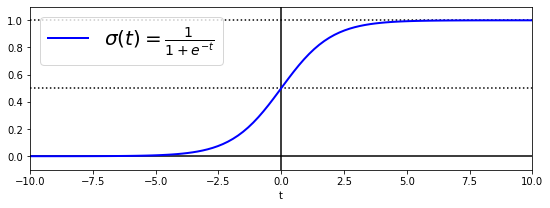

In [9]:
t = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sigma, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show() 

sigma(3.1) = 0.9568927450589139, tanh(3.1) = 0.9959493592219003$


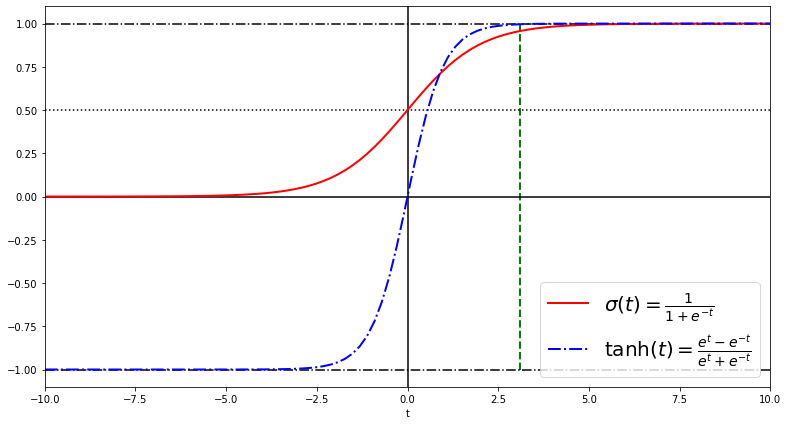

In [10]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

def hyper_tang(x):
    return((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))

print("sigma(3.1) = {}, tanh(3.1) = {}$".format(sigmoid(3.1), hyper_tang(3.1)))

t = np.linspace(-10, 10, 100)
plt.figure(figsize=(13, 7))
plt.plot([3.1, 3.1], [-1, 1], "g--", linewidth=2)
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k-.")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot([-10, 10], [-1, -1], "k-.")
plt.plot(t, sigmoid(t), "r-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.plot(t, hyper_tang(t), "b-.", linewidth=2, label=r"$\tanh(t) = \frac{e^{t} - e^{-t}}{e^{t} + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="lower right", fontsize=20)
plt.axis([-10, 10, -1.1, 1.1])
plt.show() 

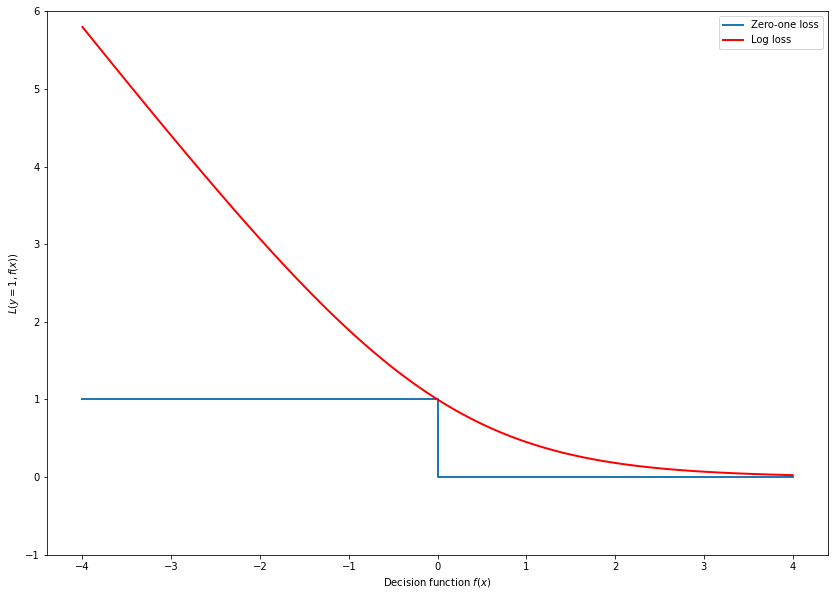

In [11]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='red', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 6));

### Если модель сильно уверена в предсказании класса, но предсказание неверно, то значение функции потерь будет лежать слева от нуля и оно будет очень высоким. Следовательно, модель будет очень сильно штрафоваться за сильную уверенность при неверном предсказании.

## В sklearn

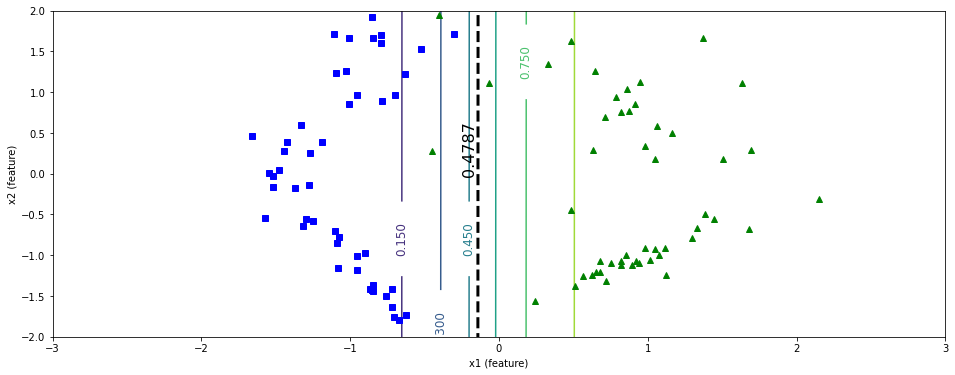

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(-2, 2, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(16, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.viridis)
left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(-0.25, 0.0, round(log_reg.intercept_[0], 4), fontsize=16, rotation=90)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.axis([-3, 3, -2, 2])
plt.show()

In [26]:
print(log_reg.intercept_[0], 
      log_reg.coef_[0][0],
      log_reg.coef_[0][1])

0.47869293523556755 3.391049083007504 -0.0010496909707447594


## Регуляризация
- $L_1$
- $L_2$

К функционалу ошибки добавляем некоторый функционал от $\theta$:

$$Q + \lambda \theta ^ 2$$

Возьмем $C = \frac {1} {\lambda}$ и получим оптимизационную задачу:
$$ \theta = \arg min_{theta} {Q(x, y, \theta)} = C * Q(x, y, \theta) + \theta ^ 2$$


# Пример

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [33]:
# знакомый нам датасет
data = pd.read_csv('~/PycharmProjects/Datasets/archive/column_2C_weka.csv')

# перекодируем целевую
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# учим knn
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.835
Precision: 0.875
Recall: 0.880
f1_score: 0.878

Test quality:
Accuracy: 0.823
Precision: 0.905
Recall: 0.844
f1_score: 0.874


In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.847
Precision: 0.881
Recall: 0.892
f1_score: 0.886

Test quality:
Accuracy: 0.887
Precision: 0.929
Recall: 0.907
f1_score: 0.918


<AxesSubplot:xlabel='feature', ylabel='importance'>

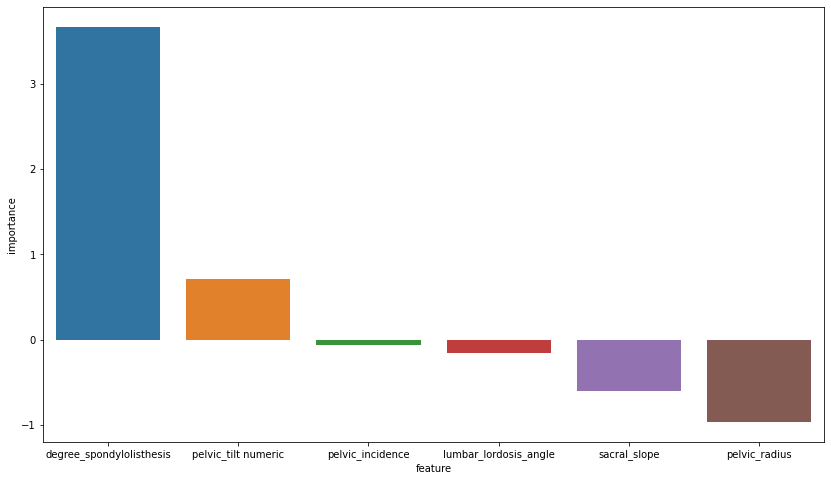

In [41]:
feature_importance = pd.DataFrame({"feature": data.drop('class',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)
plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

## Где же вероятности? 

In [39]:
knn.predict_proba(X_test_scaled)[:10]

array([[0.425, 0.575],
       [0.475, 0.525],
       [0.1  , 0.9  ],
       [0.575, 0.425],
       [0.8  , 0.2  ],
       [0.025, 0.975],
       [0.575, 0.425],
       [0.1  , 0.9  ],
       [0.8  , 0.2  ],
       [0.425, 0.575]])

In [43]:
log_reg.predict(X_test_scaled)[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [40]:
log_reg.predict_proba(X_test_scaled)[:10] 

array([[3.14328797e-01, 6.85671203e-01],
       [7.38361527e-01, 2.61638473e-01],
       [1.14764117e-01, 8.85235883e-01],
       [5.77918388e-01, 4.22081612e-01],
       [7.36011329e-01, 2.63988671e-01],
       [6.64354609e-07, 9.99999336e-01],
       [6.18620585e-01, 3.81379415e-01],
       [5.32340372e-01, 4.67659628e-01],
       [8.78172625e-01, 1.21827375e-01],
       [2.35874352e-01, 7.64125648e-01]])

In [49]:
log_reg.predict_proba(X_test_scaled)[:10][:, 1] > 0.5

array([ True, False,  True, False, False,  True, False, False, False,
        True])

In [52]:
(log_reg.predict_proba(X_test_scaled)[:10][:, 1] > 0.5).astype("int")

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [51]:
(log_reg.predict_proba(X_test_scaled)[:10][:, 1] > 0.5).astype("int") == log_reg.predict(X_test_scaled)[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

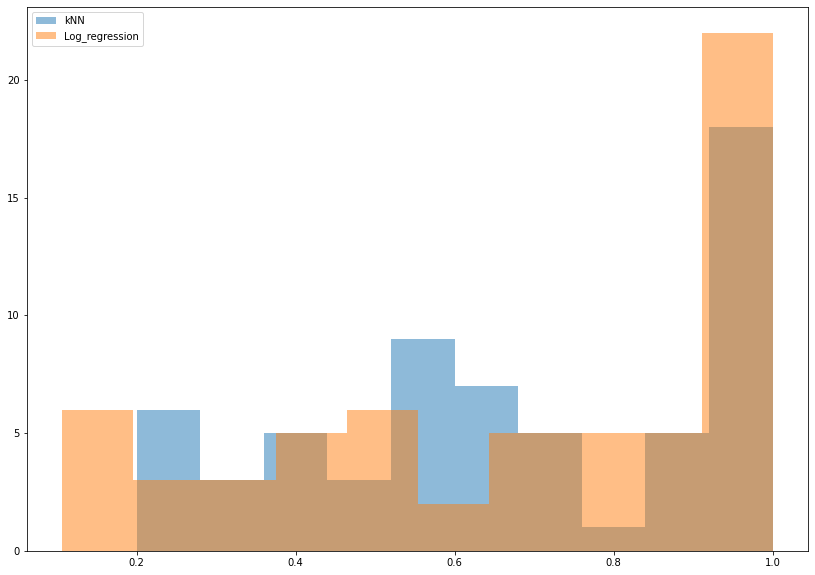

In [55]:
plt.hist(knn.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label="kNN");
plt.hist(log_reg.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label="Log_regression");
plt.legend();

In [56]:
quality_report(knn.predict(X_test_scaled), y_test) # при пороговом значении 0.5

Accuracy: 0.823
Precision: 0.905
Recall: 0.844
f1_score: 0.874


In [57]:
quality_report(knn.predict_proba(X_test_scaled)[:, 1]>0.6, y_test)

Accuracy: 0.742
Precision: 0.738
Recall: 0.861
f1_score: 0.795


In [62]:
quality_report(knn.predict_proba(X_test_scaled)[:, 1]>0.9, y_test) 
# Все, помеченные как больные действительно имеют болезнь!
# Но, зато, из всех больных были найдены только 43 %. 

Accuracy: 0.613
Precision: 0.429
Recall: 1.000
f1_score: 0.600


Всё, кроме рекола уменьшилось! Потому что среди всех отнесённых к больным действительно у большей части была болезнь.

In [58]:
quality_report(knn.predict_proba(X_test_scaled)[:, 1]>0.2, y_test)
# Все больные были найдены! 
# Однако, не все люди, классифицированные как больные, действительно больны. 

Accuracy: 0.710
Precision: 1.000
Recall: 0.700
f1_score: 0.824


In [59]:
quality_report(log_reg.predict_proba(X_test_scaled)[:, 1]>0.6, y_test)

Accuracy: 0.903
Precision: 0.881
Recall: 0.974
f1_score: 0.925


Получается неприятная ситуация. Все метрики, которые мы обсуждали, зависят от того, какой порог выставить. Это не очень круто. Хотелось бы получить что-то универсально, не зависящее от порога. 

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является $ROC-AUC$ — площадь (Area Under Curve) под кривой ошибок. Данная кривая представляет из себя линию от $(0,0)$ до $(1,1)$ в координатах $True Positive Rate (TPR)$ и $False Positive Rate (FPR)$:

True Positive Rate: $$TPR = \frac{TP}{TP + FN}$$

False Positive Rate: $$FPR = \frac{FP}{FP + TN}$$

$TPR$ нам уже известна, это полнота, а $FPR$ показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок $(FPR = 0, TPR = 1)$ мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, $ROC-AUC$ будет стремиться к $0.5$, так как классификатор будет выдавать одинаковое количество $TP$ и $FP$.

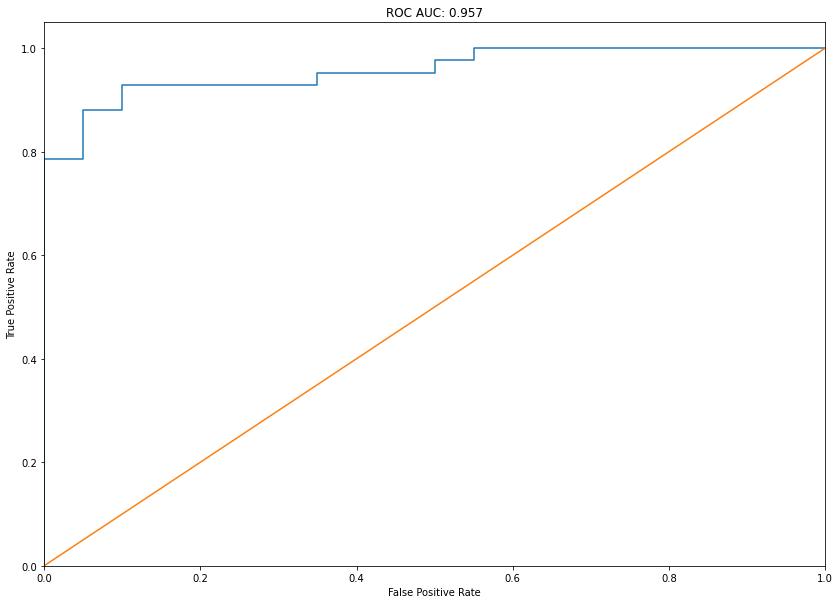

In [64]:
# подгружаем из пакета метрику roc_auc 
# и функцию для строительства кривой
from sklearn.metrics import roc_auc_score, roc_curve

# перебираем пороги и ищем для каждого fpr и tpr: 
prediction = log_reg.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()

In [67]:
thresholds

array([1.99999934, 0.99999934, 0.73087899, 0.71510928, 0.60323722,
       0.57011193, 0.52689199, 0.4454386 , 0.42208161, 0.37888371,
       0.34524764, 0.33904956, 0.3140823 , 0.10686238])

In [65]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

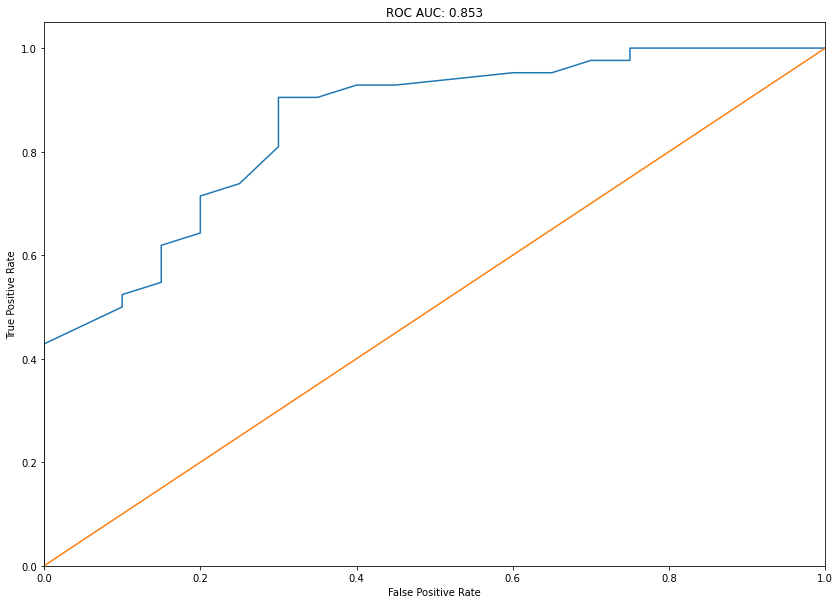

In [66]:
plot_roc_curve(knn.predict_proba(X_test_scaled)[:,1], y_test)

ROC-AUC - не интерпретируемая метрика. Она используется исключительно для сравнения моделей между собой. Но чем ближе к 1, тем лучше.  

## Мультиклассовая регрессия

Для обучения модели предсказывать $K$ классов можно натренировать $K$ классификаторов 1 против всех (one vs rest) и при предсказании брать максимальное значение. Вероятности нормализуются. Или $K(K-1)/2$ классификаторов one vs one.

Рассмотрим другой способ - softmax.

Нам необходимо получить значения для $k$ классов - составим матрицу параметров $\Theta$


$$ x = \begin{bmatrix} 1 & x_{11} & ... & x_{p1} \\ 1 & x_{12} & ... & x_{p2} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{n1}
\end{bmatrix} \quad 
\Theta = \begin{bmatrix} \theta_{01} &  ... & \theta_{0k} \\ \theta_{11} & ... & \theta_{1k} \\ ... & ... & ... \\ \theta_{p1} & ... & \theta_{pk} \end{bmatrix} \quad 
f = \begin{bmatrix} f_{01} &  ... & f_{0k} \\ f_{11} & ... & f_{1k} \\ ... & ... & ... \\ f_{n1} & ... & f_{nk}\end{bmatrix} $$

## Softmax

$$ \hat{p}_k = \frac{e^{x\theta_k}}{\sum_{j=1}^K e^{x\theta_j}} $$

$$ \hat{y}_k = {argmax}_k \hat{p}_k$$

## Оценка для случая многих классов - cross entropy

$$Q(\Theta, x) = - \frac{1}{n}\sum_{i=1}^{n}\sum_{k=1}^{K} y_{ik} \log \hat{p}_{ik}$$

In [68]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print(X[:10])
print(np.unique(Y))

logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
[0 1 2]


LogisticRegression(C=100000.0)

In [69]:
logreg.coef_

array([[-36.45485417,  30.74790446],
       [ 17.27627096, -15.5763013 ],
       [ 19.17858321, -15.17160316]])

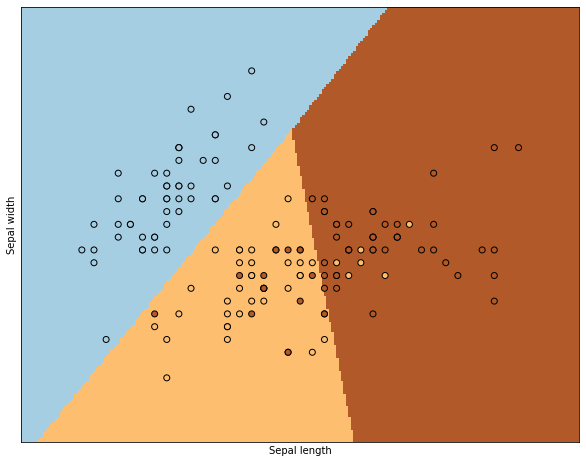

In [73]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [74]:
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
np.set_printoptions(precision=3, suppress=True)
print(Z[:10])
print(logreg.coef_)
print(logreg.intercept_)

[[0.999 0.001 0.   ]
 [0.997 0.003 0.   ]
 [0.991 0.009 0.   ]
 [0.974 0.026 0.   ]
 [0.928 0.072 0.   ]
 [0.815 0.184 0.001]
 [0.6   0.397 0.003]
 [0.339 0.656 0.005]
 [0.149 0.845 0.006]
 [0.056 0.936 0.007]]
[[-36.455  30.748]
 [ 17.276 -15.576]
 [ 19.179 -15.172]]
[ 98.718 -42.836 -55.882]


# Градиентный спуск

https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1

https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c

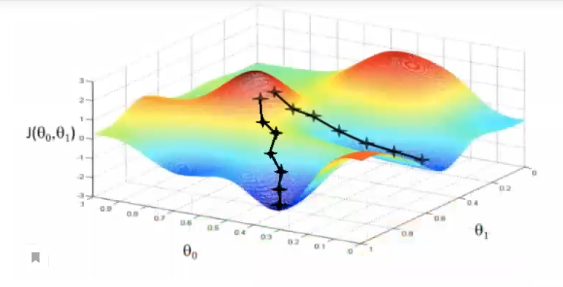

Метод градиентного спуска заключается в итеративном и одновременном обновлении значений $\theta$ в направлении, противоположному градиенту:
$$ \theta := \theta - \alpha\frac{\partial L}{\partial \theta}$$

* $\alpha$ -  скорость спуска


Посчитаем, чему равен градиент функции потерь $RSS(\theta)$

$$ RSS = \mathcal{L}(\theta) = (\hat{y} - y)^2 $$

$$ \frac{\partial L}{\partial \theta_i} = 2(\hat{y} - y)\frac{\partial L}{\partial \theta_i}(\hat{y} - y) = 2(\hat{y} - y)\frac{\partial L}{\partial \theta_i}(\theta_0x_0 + ... + \theta_1x_1 - y) = 2(\hat{y} - y)\cdot x_i$$

$$ \theta_i:= \theta_i - \alpha(\hat{y} - y)\cdot x_i$$

Или:
$$ \frac{\partial RSS(\theta)}{\partial \theta_i} = 2\sum_{i=1}^{n}(\theta^T\cdot x_i - y_i)x_i$$

$$\nabla_\theta RSS(\theta) = \left( \begin{matrix} \frac{\partial L}{\partial \theta_0} \\ \frac{\partial L}{\partial \theta_1} \\ ... \\ \frac{\partial L}{\partial \theta_p} \end{matrix} \right) = x^\top(x\theta - y)$$


Для MSE:
$$ \frac{\partial L}{\partial \theta} = \frac{1}{n} X^\top(X\theta - y)$$

In [75]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

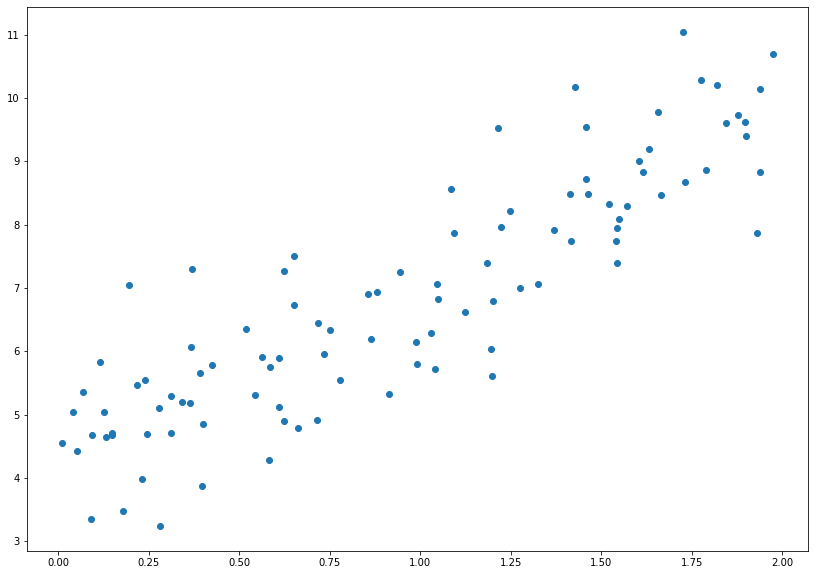

In [92]:
plt.scatter(X, y);

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.215]), array([[2.77]]))

In [77]:
theta_best = np.vstack([lin_reg.intercept_, lin_reg.coef_.ravel()])

In [78]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.215],
       [9.755]])

## Псевдокод алгоритма

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

In [79]:
from sklearn.metrics import mean_squared_error

193 9.86249315402732e-05


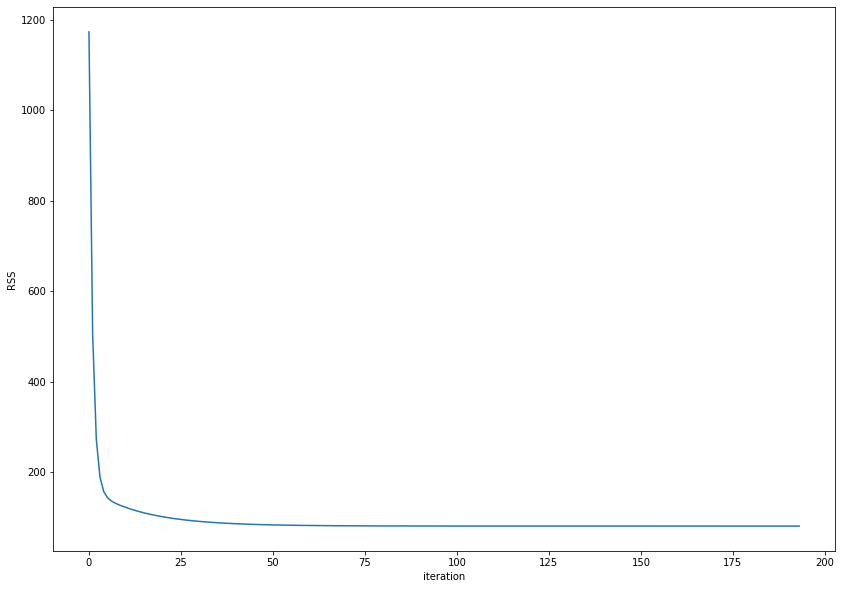

In [80]:
X_b = np.c_[np.ones((100, 1)), X]

alpha = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
eps = 0.0001
rss_history = []
for iteration in range(n_iterations):
    
    gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
    
    theta_old = theta
    theta = theta - alpha * gradients
    
    dist = np.linalg.norm(theta - theta_old)
    rss = mean_squared_error(X_b.dot(theta), y) * len(y)
    
    rss_history.append(rss)
    if dist < eps:
        break
        
print(iteration, dist)
plt.plot(rss_history)
plt.ylabel("RSS")
plt.xlabel("iteration");

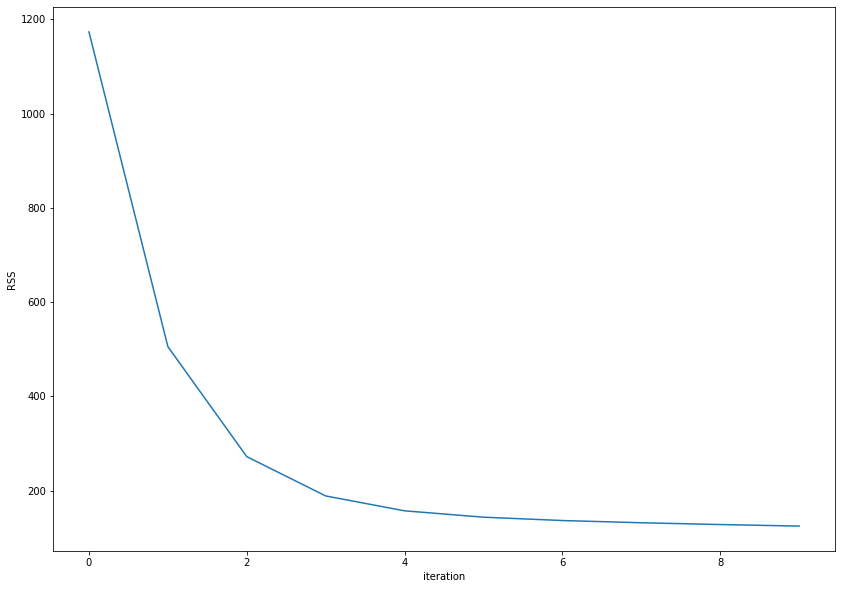

In [95]:
plt.plot(rss_history[:10])
plt.ylabel("RSS")
plt.xlabel("iteration");

In [98]:
theta, rss

(array([[4.213],
        [2.772]]),
 80.65859012002446)

In [99]:
lin_reg.intercept_, lin_reg.coef_

(array([4.215]), array([[2.77]]))

In [104]:
for element in zip([lin_reg.intercept_, lin_reg.coef_], theta):
    print(element)

(array([4.215]), array([4.213]))
(array([[2.77]]), array([2.772]))


# Влияние learning rate

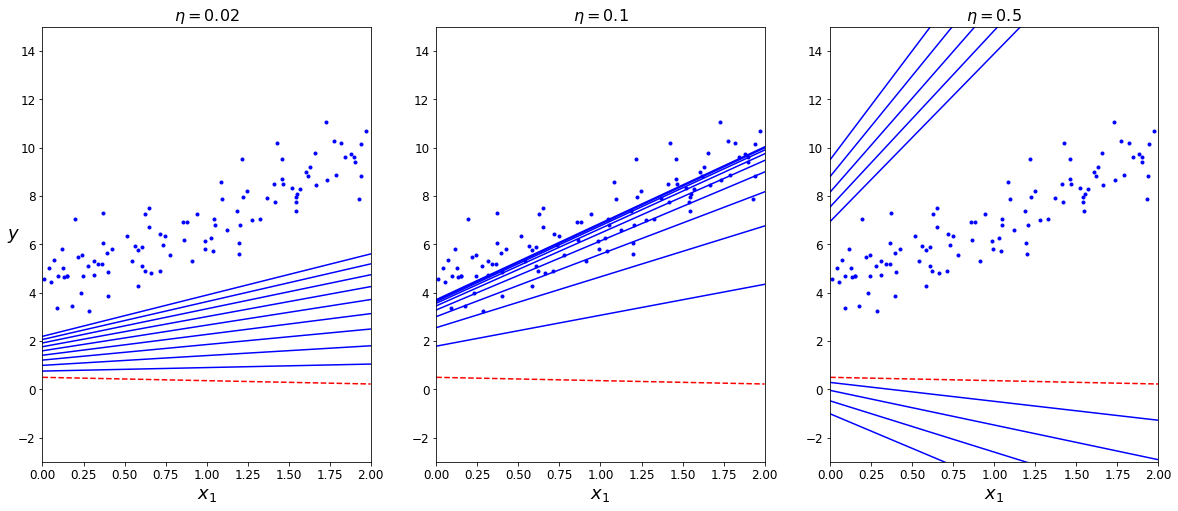

In [110]:
def plot_gd_examples():
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    theta_path_bgd = []

    def plot_gradient_descent(theta, eta, theta_path=None):
        m = len(X_b)
        plt.plot(X, y, "b.")
        n_iterations = 1000
        for iteration in range(n_iterations):
            if iteration < 10:
                y_predict = X_new_b.dot(theta)
                style = "b-" if iteration > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - eta * gradients
            if theta_path is not None:
                theta_path.append(theta)
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0, 2, -3, 15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=16)

    np.random.seed(42)
    theta = np.random.randn(2,1)  

    plt.figure(figsize=(20,8))
    plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
    plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
    plt.show()
    
plot_gd_examples()

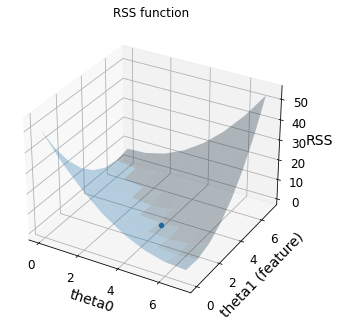

In [111]:
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
fig=plt.figure()
ax = Axes3D(fig)

t1_surfs = np.arange(0, 8, 1)
t2_surfs = np.arange(0, 8, 1)
t1_surf, t2_surf = np.meshgrid(t1_surfs, t2_surfs)
t = np.c_[np.ravel(t1_surf), np.ravel(t2_surf)]
x_b = np.c_[X, np.ones(X.shape[0])]
zs = np.array([mean_squared_error(x_b.dot(t_i.reshape(-1, 1)), y) for t_i in t])
z = zs.reshape(t1_surf.shape)
ax.plot_surface(t2_surf, t1_surf, z, alpha=0.3)

ax.scatter(theta[0], theta[1], mean_squared_error(x_b.dot(theta), y) , marker='o')

ax.set_title("RSS function")
ax.set_xlabel("theta0")
ax.set_ylabel("theta1 (feature)")
ax.set_zlabel("RSS")

plt.show()

## Стохастический градиентный спуск


Проблема - используется вся обучающая выборка на каждом шаге алгоритма  
Решение - использовать один случайный элемент выборки

Больше шума, но зато вычислительно более простой вариант.

### Градиентный спуск

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

### Стохастический градиентный спуск

```{python}
1.function sgd(X, alpha, epsilon):
2. 	initialise theta 
3. 	do: 
4.        X = shuffle(X)
5.        for x in X:
6.            theta = new_theta
7.            new_theta = theta - alpha * grad(x, theta)
8.	until dist(new_theta, theta) < epsilon
9.	return theta
```

[[4.207]
 [2.755]]


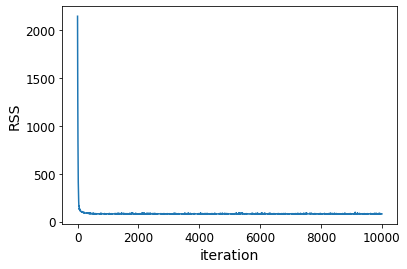

In [112]:
m = len(X_b)
alpha = 0.01
n_epochs = 100
t0, t1 = 5., 50  # learning schedule hyperparameters

theta = np.random.randn(2,1)  # random initialization
rss_history = []
for epoch in range(n_epochs):
    p = np.random.permutation(m)
    for idx in p:
        random_index = np.random.randint(m)
        xi = X_b[[idx], :]
        yi = y[[idx], :]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - alpha * gradients
        rss = mean_squared_error(X_b.dot(theta), y) * len(y)
        rss_history.append(rss)
        
print(theta)
plt.plot(rss_history)
plt.ylabel("RSS")
plt.xlabel("iteration");

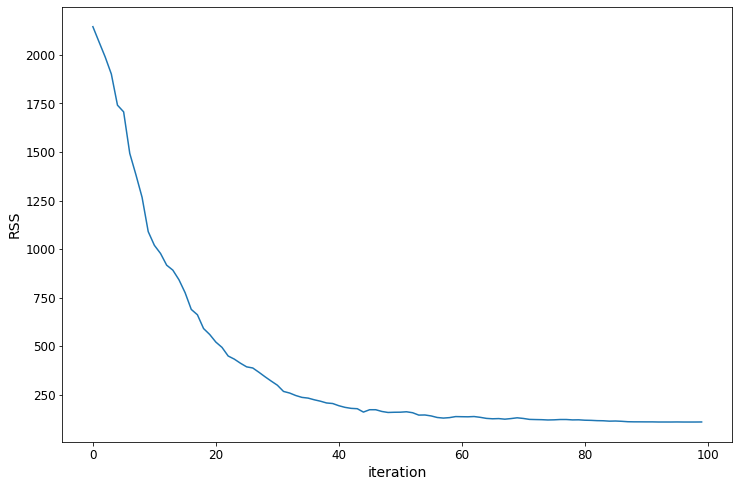

In [124]:
plt.figure(figsize=[12,8])
plt.plot(rss_history[:100])
plt.ylabel("RSS")
plt.xlabel("iteration");

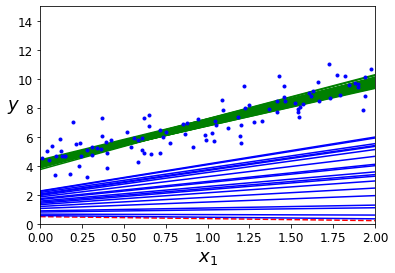

In [119]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
alpha = 0.01
n_epochs = 100
t0, t1 = 5., 50  # learning schedule hyperparameters

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - alpha * gradients
        theta_path_sgd.append(theta)  
        
    y_predict = X_new_b.dot(theta)   
    plt.plot(X_new, y_predict, 'g-')

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                       
plt.show();

# Градиентный спуск для логистической регрессии

## Бинарная классификация, log loss
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

![](https://miro.medium.com/max/1071/1*yWzKLQhWITQ4bR2aMSVVuw.png)

$$ Q(\theta, x) = - \frac{1}{m}\sum_{i=1}^{n}[y_i \log (\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)]$$

$$ \frac{\partial Q(\theta_j, x)}{\partial \theta_i} = \frac{1}{n} \sum_{i=1}^{n}(\sigma(\theta^T\cdot x_i) - y_i)x_ij$$

## cross entropy

$$Q(\Theta, x) = - \frac{1}{n}\sum_{i=1}^{n}\sum_{k=1}^{K} y_{ik} \log \hat{p}_{ik}$$

где K - число классов.


$$\nabla_{\theta_k}  Q(\Theta, x) = \frac{1}{n} \sum_{i=1}^{n} (\hat{p}_{ki} - y_{ki})x_i $$

In [126]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print(X[:10])
print(np.unique(Y))

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, Y.ravel())

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
[0 1 2]


LogisticRegression(C=10, multi_class='multinomial')

In [127]:
print(softmax_reg.coef_)
print(softmax_reg.intercept_)

[[-5.1    4.576]
 [ 1.651 -2.558]
 [ 3.449 -2.018]]
[ 13.819  -0.516 -13.303]


In [128]:
print(logreg.coef_)
print(logreg.intercept_)

[[-36.455  30.748]
 [ 17.276 -15.576]
 [ 19.179 -15.172]]
[ 98.718 -42.836 -55.882]


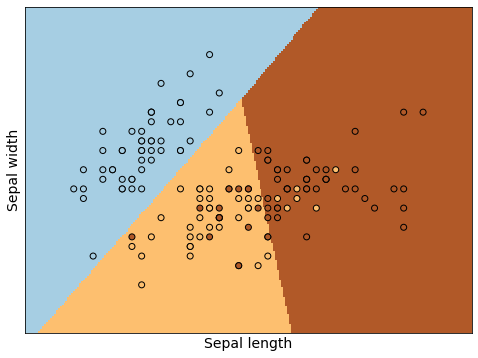

In [130]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

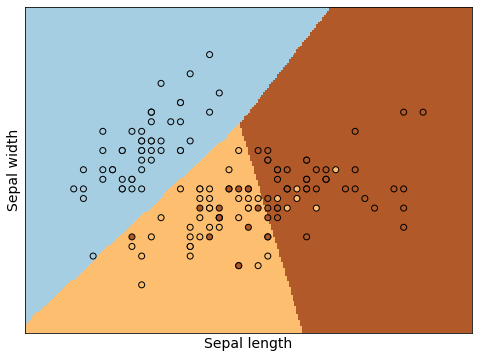

In [131]:
h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max()) 
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(()) 
plt.show()

### Дополнительные материалы

- лекции К.В. Воронцова http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf (есть также видео-записи)
- курс fast.ai http://wiki.fast.ai/index.php/Logistic_Regression
- документация sklearn http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html